DAFTAR PUSTAKA

In [22]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from skimage.feature import hog
from mlxtend.plotting import plot_confusion_matrix

MEMANGGIL DATASESTS

In [23]:
# Load Dataset
train_data = pd.read_csv('/content/emnist-bymerge-train.csv', header=None)
test_data = pd.read_csv('/content/emnist-bymerge-test.csv', header=None)


Pembagian sampel dan perubahan jenis dari bilangan ke images

In [24]:
# Split Data into Features and Labels
X_train = train_data.iloc[:, 1:].values.reshape(-1, 28, 28).astype('float32')
y_train = train_data.iloc[:, 0].values.astype('int')
X_test = test_data.iloc[:, 1:].values.reshape(-1, 28, 28).astype('float32')
y_test = test_data.iloc[:, 0].values.astype('int')


In [25]:
# Set Minimum and Maximum Index for Test Data
min_test_samples = 500  # Set minimum index for test samples
max_test_samples = 1000  # Set maximum index for test samples

In [26]:
# Apply the Range to Test Data
X_test = X_test[min_test_samples:max_test_samples]
y_test = y_test[min_test_samples:max_test_samples]

In [27]:
# Limit Training Samples
max_samples_train = 500
if len(X_train) > max_samples_train:
    X_train = X_train[:max_samples_train]
    y_train = y_train[:max_samples_train]


In [28]:
# HOG Feature Extraction with Tuning
def extract_hog_features(images, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2)):
    hog_features = []
    hog_images = []
    for image in images:
        feature, hog_img = hog(image.reshape((28, 28)),
                               orientations=orientations,
                               pixels_per_cell=pixels_per_cell,
                               cells_per_block=cells_per_block,
                               visualize=True,
                               block_norm='L2')
        hog_features.append(feature)
        hog_images.append(hog_img)
    return np.array(hog_features), np.array(hog_images)

In [29]:
# Extract HOG Features from Training and Test Data
hog_features_train, hog_images_train = extract_hog_features(X_train, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
hog_features_test, hog_images_test = extract_hog_features(X_test, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2))



In [30]:
# Standardize HOG Features
scaler = StandardScaler()
hog_features_train_scaled = scaler.fit_transform(hog_features_train)
hog_features_test_scaled = scaler.transform(hog_features_test)

In [31]:
# SVM Classifier with Tuned Parameters
clf = svm.SVC(kernel='rbf', C=1, gamma='scale')


In [32]:
# Evaluation with LOOCV
loo = LeaveOneOut()
y_pred = cross_val_predict(clf, hog_features_train_scaled, y_train, cv=loo)



In [33]:
# Calculate Evaluation Metrics
loo_confusion_matrix = confusion_matrix(y_train, y_pred)
loo_accuracy = accuracy_score(y_train, y_pred)
loo_precision = precision_score(y_train, y_pred, average='weighted', zero_division=1)
loo_recall = recall_score(y_train, y_pred, average='weighted', zero_division=1)
loo_f1 = f1_score(y_train, y_pred, average='weighted', zero_division=1)


In [34]:
# Display Results
print("\nLOOCV Results (Training Data):")
print("Confusion Matrix:\n", loo_confusion_matrix)
print("Accuracy:", loo_accuracy)
print("Precision:", loo_precision)
print("Recall:", loo_recall)
print("F1 Score:", loo_f1)



LOOCV Results (Training Data):
Confusion Matrix:
 [[29  0  0 ...  0  0  0]
 [ 0 21  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  3  2]
 [ 0  1  1 ...  0  0 16]]
Accuracy: 0.53
Precision: 0.6284588281466535
Recall: 0.53
F1 Score: 0.4489705077816033


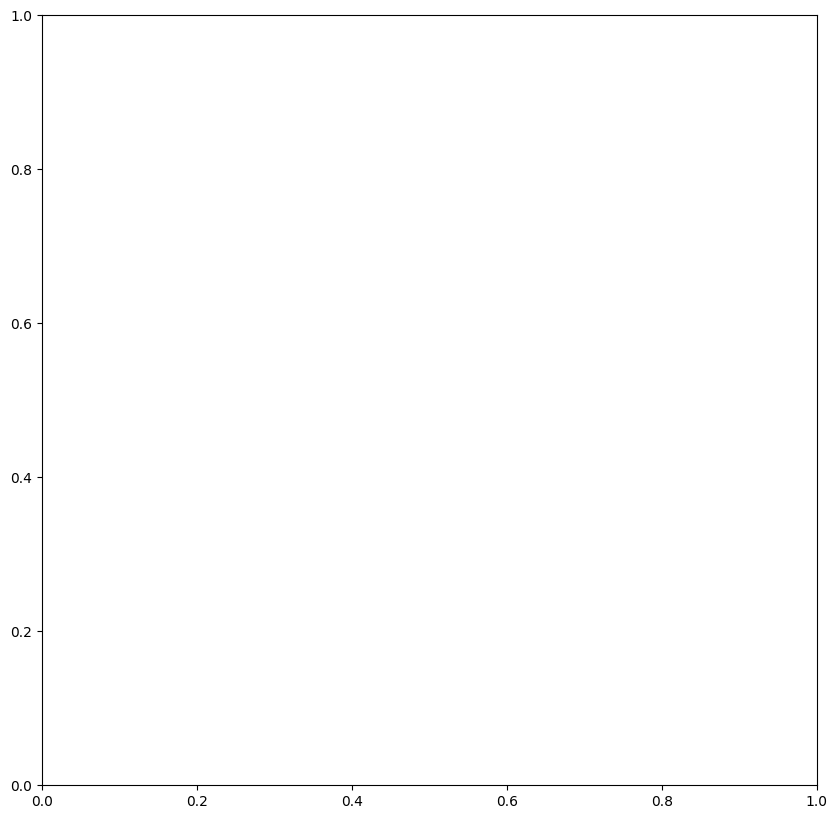

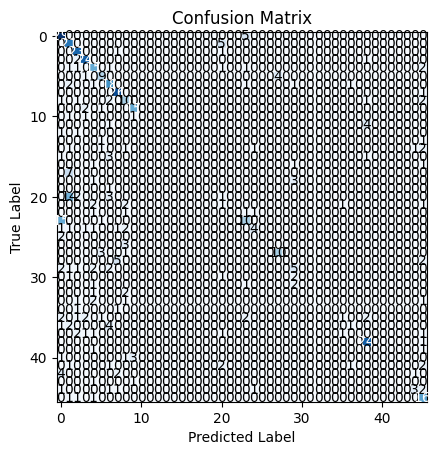

In [35]:
from mlxtend.plotting import plot_confusion_matrix

# Plot Confusion Matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(conf_mat=loo_confusion_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [36]:
# Comparison of Original and HOG Features Images
def plot_images_with_hog(X, hog_images, title=""):
    fig, axes = plt.subplots(2, 10, figsize=(15, 5))
    fig.suptitle(title)

    # Plot original images
    for i in range(min(len(X), 10)):
        axes[0, i].imshow(X[i].reshape((28, 28)), cmap='gray')
        axes[0, i].axis('off')

    # Plot HOG images
    for i in range(min(len(hog_images), 10)):
        axes[1, i].imshow(hog_images[i].reshape((28, 28)), cmap='gray')
        axes[1, i].axis('off')

    plt.show()

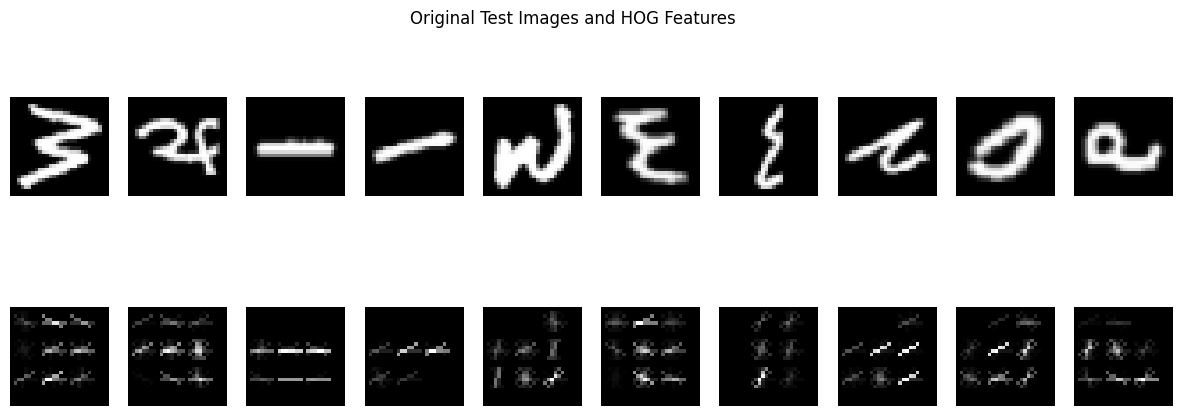

In [37]:
plot_images_with_hog(X_test, hog_images_test, title="Original Test Images and HOG Features")